# Forma de la Tierra

En este código se busca ilustrar la forma de la tierra con base en el libro de F. Javier Gil Chica "Teoría de Eclipses, Ocultaciones y Tránsitos". Se va a hacer uso de las ecuaciones obtenidas por el autor para describir las coordenadas "x" y "y" de la supericie de la tierra y el radio de esta misma. Las expresiones algebraicas serían las siguientes:

Sean las constantes $a,b,c,e$, donde se definen de la siguiente manera:

\begin{align*}
a &= \text{semieje mayor o radio ecuatorial} && c = \text{achatamiento terrestre} \\ 
b &= \text{semieje menor o radio polar} && e = \text{eccentricidad de la elipse meridiana}
\end{align*}

Las últimas dos se definen a partir de las primeras, por lo tanto se definen con estos valores:

\begin{align*}
a = 6378km && b = 6357km
\end{align*}

Entonces, según Javier Gil Chica, se define el achatamiento y la eccentricidad cómo:

\begin{align*}
c = 1 - \frac{b}{a} && e = 1 - (1-c)^{2}
\end{align*}

Ahora, se definen las coordenadas:

\begin{align*}
x = \rho \cos {\varphi}' &&& y = \rho \sin {\varphi}' \\
\\
\rho &= a\frac{1-2{e}^{2}{\sin}^{2}\varphi + {e}^{4}{\sin}^{2}\varphi}{(1-{e}^{2}{\sin}^{2}\varphi)^{\frac{1}{2}}}
\end{align*}

Asimismo, se debe aclarar:

\begin{align*}
\varphi &= \text{latitud geográfica} \\ 
\varphi' &= \text{latitud geocéntrica}
\end{align*}

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [18]:
# Se definen constantes
a = 6378 # semieje mayor
b = 6357 # semieje menor
c = 1 - b/a # achatamiento terrestre
e = 1 - (1-c)**2 # eccentricidad 

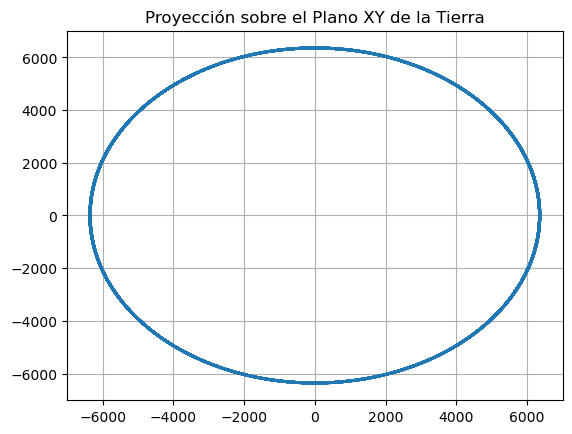

In [25]:
phi = np.arange(-90,90,0.1) # latitud geográfica
phi_prime = np.arange(0,360,0.2) # latitud geocéntrica
rho = a*(1-2*(e)**(2)*np.sin(phi) + (e)**(4)*(np.sin(phi))**2)/(np.sqrt(1-(e)**(2)*(np.sin(phi)**2)))# radio de la tierra
x = rho*np.cos(phi_prime)
y = rho*np.sin(phi_prime)
plt.plot(x,y)
plt.grid()
plt.title("Proyección sobre el Plano XY de la Tierra")
plt.show()